## Import necessary libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

## Load the Fashion MNIST dataset

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape the data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Define the model with regularization

In [5]:
inputs = Input(shape=(28, 28, 1))

# Convolutional layers with BatchNorm and Dropout
net = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.3)(net)

net = Conv2D(64, (3, 3), activation='relu', padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.4)(net)

net = Conv2D(128, (3, 3), activation='relu', padding='same')(net)
net = BatchNormalization()(net)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.5)(net)

# Fully connected layers
net = Flatten()(net)
net = Dense(128, activation='relu')(net)
net = Dropout(0.5)(net)
outputs = Dense(10, activation='softmax')(net)

# Compile the model
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Data augmentation

In [6]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)
datagen.fit(x_train)

### Train the model with augmented data

In [7]:
batch_size = 64
epochs = 50
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // batch_size
)

Epoch 1/50


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.5377 - loss: 1.3747 - val_accuracy: 0.7876 - val_loss: 0.5370
Epoch 2/50
  1/937 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.7500 - loss: 0.5578

D:\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.7500 - loss: 0.5578 - val_accuracy: 0.7861 - val_loss: 0.5394
Epoch 3/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.7461 - loss: 0.6694 - val_accuracy: 0.8114 - val_loss: 0.4908
Epoch 4/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.8906 - loss: 0.4390 - val_accuracy: 0.8083 - val_loss: 0.4975
Epoch 5/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 51s 55ms/step - accuracy: 0.7734 - loss: 0.5995 - val_accuracy: 0.8311 - val_loss: 0.4327
Epoch 6/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7812 - loss: 0.5280 - val_accuracy: 0.8297 - val_loss: 0.4359
Epoch 7/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.7922 - loss: 0.5555 - val_accuracy: 0.8500 - val_loss: 0.3988
Epoch 8/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.4087 - val_accuracy: 0.8516 - val_loss: 0.3954
Epoch 9/50
937/937 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.8039 - loss: 0.5320 - val_accuracy: 0

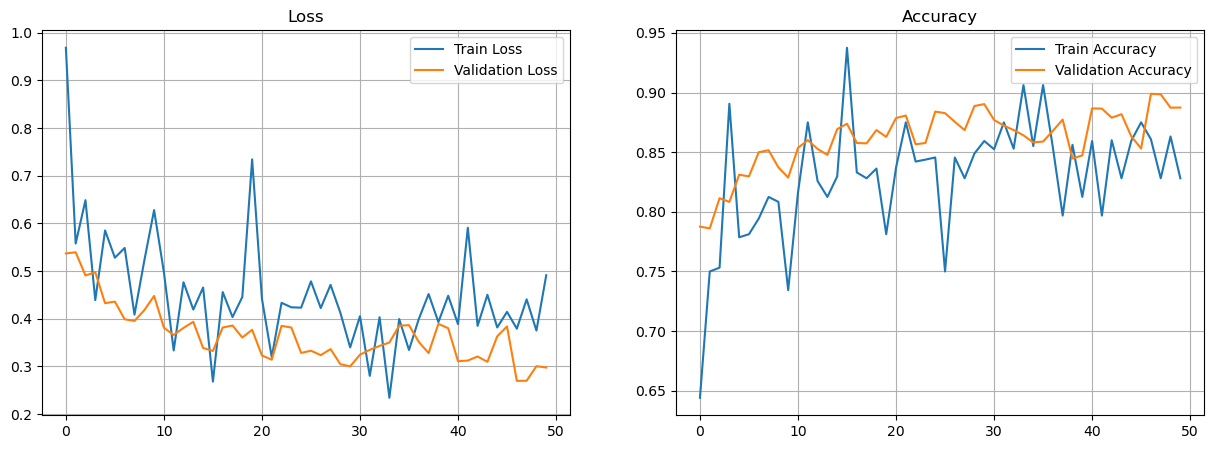

In [8]:
# Function for displaying training graphs
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, h['loss'], label='Train Loss')
    plt.plot(epochs, h['val_loss'], label='Validation Loss')
    plt.legend()
    plt.grid()
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, h['accuracy'], label='Train Accuracy')
    plt.plot(epochs, h['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.grid()
    plt.title('Accuracy')

plot_history(history)